In [18]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np

In [19]:
ccd = pd.read_excel('Credit Card Data.xlsx') 
custacq = pd.read_csv('Customer Acqusition.csv')
repay = pd.read_csv('Repayment.csv')
spend = pd.read_csv('Spend.csv')

# 1. In the above dataset :
## a. In case age is less than 18, replace it with mean of age values.

In [20]:
custacq[custacq['Age'] < 18] = custacq['Age'].mean() 

## b. In case spend amount is more than the limit, replace it with customer's 50% of the limit.

In [21]:
custspend = pd.merge(left= custacq,
                    right= spend,
                    left_on= 'Customer',
                    right_on= 'Customer',
                    how= 'inner')
custspend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [22]:
cust_limit = 0.5 * custspend['Limit']
custspend.loc[custspend['Amount'] > custspend['Limit'],['Amount']] = cust_limit

## c. Incase repayment amout is more than the limit, replace the repayment with the limit

In [24]:
csr = pd.merge(left= custspend,
              right= repay,
              left_on= 'Customer',
              right_on= 'Customer',
              how = 'inner')

csr.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Unnamed: 4
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,NaN,12-Jan-04,495414.75,NaN
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,3-Jan-04,245899.02,NaN
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,15-Jan-04,259490.06,NaN
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,25-Jan-04,437555.12,NaN
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,17-Jan-05,165972.88,NaN


In [25]:
csr.loc[csr['Amount_y'] > csr['Limit'], ['Amount_y']] = csr['Limit']

# 2 . From the above created datasets create the following summaries :
## a. How many distinct customers exists?


In [26]:
uni = csr['Customer'].unique()
len(uni)

94

## b. How many distinct categories exists?


In [27]:
discat = csr['Type'].unique()
discat

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'TRAIN TICKET', 'BUS TICKET', 'AIR TICKET', 'MOVIE TICKET',
       'RENTAL', 'BIKE', 'AUTO', 'SHOPPING'], dtype=object)

## c. What is the average monthly spend by customers?

In [28]:
csr['Month_x'] = pd.to_datetime(csr['Month_x'])
csr['Spend_Month'] = csr['Month_x'].dt.month
csr.groupby(['Customer','Spend_Month']).Amount_x.mean()

Customer  Spend_Month
A1        1              372762.587143
          2              175235.690000
          4              261649.250000
          5              361141.310000
          8              344372.100000
                             ...      
A95       1              240401.500000
A96       1               54729.660000
A97       1                5000.000000
A98       1                5000.500000
A99       1                5001.000000
Name: Amount_x, Length: 550, dtype: float64

## d. What is average monthly repayment by customers?

In [29]:
csr['Month_y'] = pd.to_datetime(csr['Month_y'])
csr['Repay_Month'] = csr['Month_y'].dt.month
csr.groupby(['Customer','Repay_Month']).Amount_y.mean()

Customer  Repay_Month
A1        1              343972.327143
          2              156374.760000
          4              254474.580000
          7              297176.740000
          9              186427.500000
                             ...      
A95       1              369405.960000
A96       1              100000.000000
A97       1               10000.000000
A98       1               10001.000000
A99       1               10002.000000
Name: Amount_y, Length: 531, dtype: float64

## e. If the monthly rate of interest is 2.9%, what is profit for each month?

In [30]:
csr['Monthly_Profit'] = csr.Amount_y - csr.Amount_x
MP =pd.DataFrame(csr.groupby('Spend_Month').Monthly_Profit.sum())
# rate can be applied to only positive values
MP1 = MP[MP.Monthly_Profit > 0]
MP1['Rate'] = MP1.Monthly_Profit * 2.9
MP1

C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Monthly_Profit,Rate
Spend_Month,,
1,1.030017e+08,2.987049e+08
2,1.309491e+08,3.797524e+08
3,1.004568e+08,2.913247e+08
4,8.169659e+07,2.369201e+08
5,7.168065e+07,2.078739e+08
8,1.463915e+07,4.245353e+07
9,2.676622e+07,7.762203e+07
10,3.091092e+07,8.964167e+07
11,4.575313e+07,1.326841e+08


## f. What are the top 5 product types?

In [111]:
csr.groupby('Type').Amount_x.sum().reset_index().sort_values('Amount_x', ascending = False).head(5)

,Type,Amount_x
10,PETRO,6.839e+08
4,CAMERA,6.756e+08
14,TRAIN TICKET,5.031e+08
7,FOOD,5.017e+08
0,AIR TICKET,4.813e+08



## g. Which City have maximum spend?

In [107]:
ciMax = pd.DataFrame(csr.groupby('City').Amount_x.sum().reset_index().sort_values('Amount_x', ascending = False)).head(1)
ciMax

,City,Amount_x
2,CALCUTTA,1.114e+09


## h. Which age group is spending more money?

In [92]:
csr['Age_group'] = np.where((csr['Age']> 18) & (csr['Age'] <= 30), 'Young Adults',np.where((csr['Age']> 30) & (csr['Age'] <= 60), 'Adults', 'Seniors' ))

In [101]:
csr.groupby('Age_group').Amount_x.sum().reset_index().sort_values('Amount_x', ascending = False)

,Age_group,Amount_x
0,Adults,2.718e+09
2,Young Adults,1.585e+09
1,Seniors,9.854e+08


In [33]:
Amt_Age =csr.groupby('Age').Amount_x.sum()
Amt_Age.nlargest(1)

Age
28.0    6.155e+08
Name: Amount_x, dtype: float64

## i. Who are the top 10 customers in term of repayment?


In [34]:
c1 =pd.DataFrame(csr.groupby('Customer').Amount_y.sum())
c1.sort_values('Amount_y', ascending = False).head(10)

,Amount_y
Customer,
A61,4.005e+08
A60,3.753e+08
A13,2.967e+08
A43,2.632e+08
A45,2.619e+08
A12,2.584e+08
A44,2.401e+08
A39,2.363e+08
A42,2.361e+08


# 3. Calculate the city wise spend on each product on yearly basis. also show graphical representation.

In [35]:
csr['Year'] = csr['Month_x'].dt.year
cityspendYear = pd.DataFrame(csr.groupby(['City','Product','Year']).Amount_x.sum())

cityspendYear

Amount_x
City       Product  Year           
BANGALORE  Gold     2004  1.913e+08
                    2005  2.447e+08
                    2006  2.585e+08
           Platimum 2004  2.943e+07
                    2005  2.243e+07
...                             ...
TRIVANDRUM Platimum 2005  1.116e+08
                    2006  6.657e+07
           Silver   2004  3.800e+06
                    2005  5.128e+06
                    2006  8.711e+06

[72 rows x 1 columns]

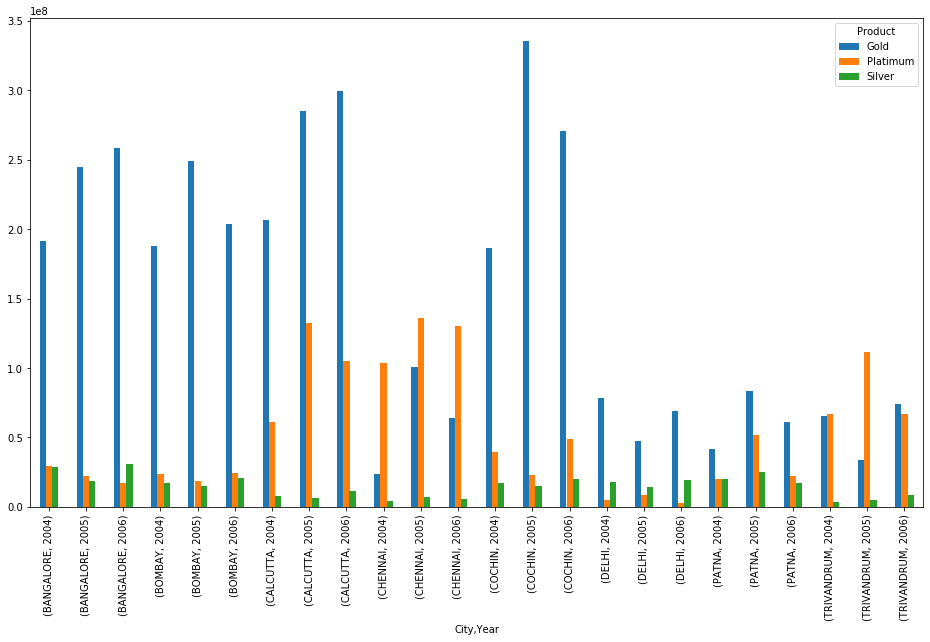

In [82]:
#reshaping
bargraph = pd.pivot_table(csr , index= ['City','Year'], columns='Product', values= 'Amount_x', aggfunc= sum).plot(kind = 'bar', figsize = (16,9))

# 4. Create graphs for : 
## a. Monthly comparison of total spend city wise

In [36]:
csr.groupby(['Spend_Month','City']).Amount_x.sum()

Spend_Month  City      
1            BANGALORE     1.884e+08
             BOMBAY        1.657e+08
             CALCUTTA      2.529e+08
             CHENNAI       1.133e+08
             COCHIN        2.408e+08
                             ...    
12           CHENNAI       4.249e+06
             COCHIN        2.273e+07
             DELHI         1.294e+07
             PATNA         1.550e+06
             TRIVANDRUM    1.757e+07
Name: Amount_x, Length: 96, dtype: float64

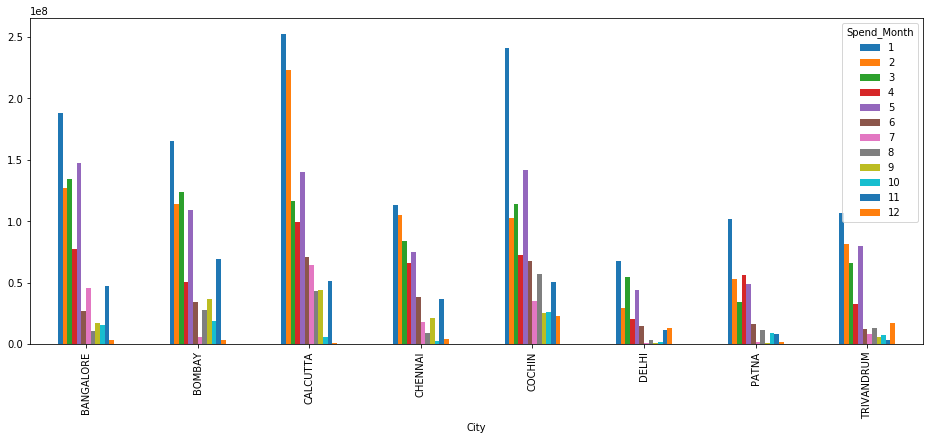

In [81]:
plot1 =pd.pivot_table(csr, index= 'City', columns= 'Spend_Month', values = 'Amount_x', aggfunc= sum ).plot.bar(figsize = (16,6))
plt.show()


## b. Comparison of yearly spend on air ticket

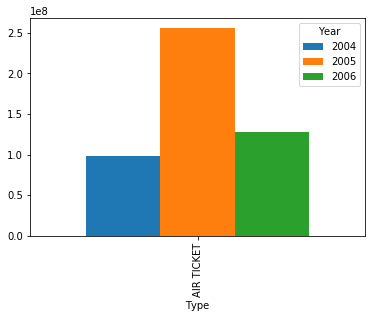

In [80]:
pd.pivot_table(data= csr[csr['Type']=='AIR TICKET'], index = "Type", columns= 'Year', values= 'Amount_x', aggfunc= sum).plot(kind ='bar', width = 1)

## c. Comparison of monthly spend for each product

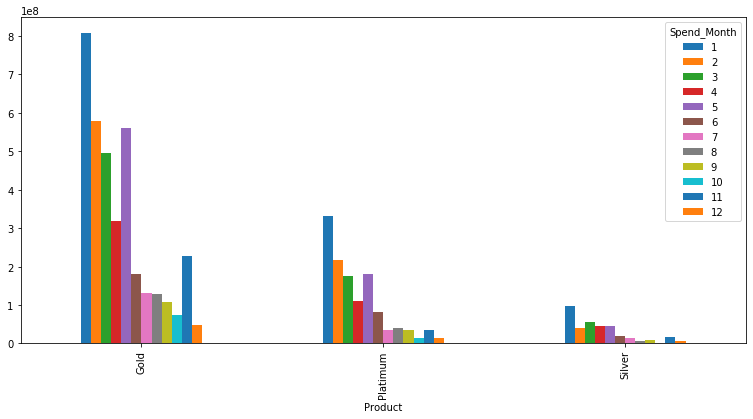

In [77]:
plot2 = pd.pivot_table(csr, index= 'Product', columns='Spend_Month', values = 'Amount_x', aggfunc= sum).plot.bar(figsize = (13,6))